In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter as writer
from svgd import Kernel, SVGD_model
plt.rcParams['animation.ffmpeg_path'] = "C:\\ffmpeg-2024-02-15-git-a2cfd6062c-full_build\\bin\\ffmpeg.exe"

# Define prob dist model/form
class MVN():
    def __init__(self, mean, cov):
        self.mean = mean
        self.cov = cov
    def dlnprob(self, x):
        return -1 * np.matmul((x - self.mean), np.linalg.inv(self.cov))
    def dist(self):
        return multivariate_normal(self.mean,self.cov)
    
# Distributional Details
bd=4
cov = np.array([[0.2260, 0.1652], [0.1652, 0.6779]])
mean = np.zeros_like(np.random.uniform(-bd,bd,size=(2)))
mvn_model = MVN(mean, cov)
dlnprob = mvn_model.dlnprob

# SVGD
svgd_model = SVGD_model(Kernel())
x0 = np.random.uniform(-bd,bd,size=(15,2))

# Run & update
n_iter = 2000
x, history,full_history = svgd_model.update(x0, dlnprob, n_iter=n_iter, stepsize=1e-1)
print ("Mean ground truth: ", mean)
print ("Mean obtained by svgd: ", np.mean(x, axis=0))
print("Cov ground truth: ", cov)
print("Cov obtianed by svgd: ", np.cov(x.T))

Mean ground truth:  [0. 0.]
Mean obtained by svgd:  [-0.00013572  0.0014084 ]
Cov ground truth:  [[0.226  0.1652]
 [0.1652 0.6779]]
Cov obtianed by svgd:  [[0.21175599 0.15643426]
 [0.15643426 0.64224534]]


In [2]:
x = np.linspace(-bd,bd,n_iter)
X, Y = np.meshgrid(x,x)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = mvn_model.dist()

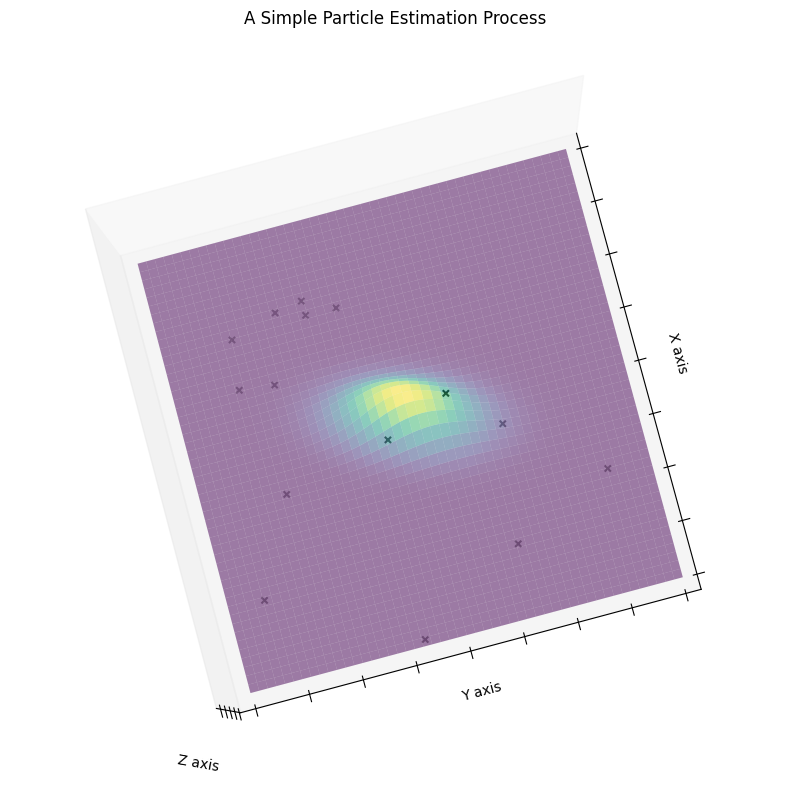

In [6]:
def animate(i):
    ax.clear()
    #Make a 3D plot
    ax.set_title('A Simple Particle Estimation Process')
    ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0,alpha=0.5)
    ax.scatter(full_history[i][:,0], full_history[i][:,1],rv.pdf(full_history[i])+1/1000,marker='x', color='k')
    ax.view_init(elev=85, azim=0, roll=15)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xlim(-bd-1/9,bd+1/9)
    ax.set_ylim(-bd-1/9,bd+1/9)
    ax.grid(False)
    
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'},figsize=(10,10))
ani = FuncAnimation(fig, animate, interval=10,frames=1)
FFwriter = writer(fps=10)
ani.save('C:\\Users\\siphe\\Documents\\animation_.mp4', writer = FFwriter)
